# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Additional libraries
import datetime
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

Your tasks:
* Import data from the provided GitHub repo using `pandas`
* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`
* You may need to change column names to make them easier to work with
* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method

Data files to import: 
1. GDP
2. Inflation 
3. Apple stock prices 
4. Microsoft stock prices

In [3]:
# List files in the current directory
files = os.listdir('.')
files

['apple_historical_data.csv',
 'inflation_monthly.csv',
 'readme.md',
 'microsoft_historical_data.csv',
 'consumer_price_index.csv',
 '.ipynb_checkpoints',
 'GDP.csv',
 'Preparing-for-data-analysis-project-student.ipynb']

Lets start with importing GDP data.

In [4]:
gdp = pd.read_csv('GDP.csv')

Lets take an initial look at GDP data.

In [5]:
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [6]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    309 non-null    object 
 1   GDP     309 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [7]:
gdp.describe()

,GDP
count,309.000000
mean,7227.754935
std,7478.297734
min,243.164000
25%,804.981000
50%,4386.773000
75%,12527.214000
max,28284.498000


**Observations:**
- Data is provided on a quarterly basis
- Data begins from 1947
- GDP begins from a value of 243.15 in 1948 to a max value of 28284.498. We can explore later the time variation of GDP.

Next, lets import Inflation data.

In [8]:
inflation = pd.read_csv('inflation_monthly.csv')

Lets take an initial look at the monthly Inflation date.

In [9]:
inflation.head()

,DATE,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [10]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  675 non-null    object 
 1   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB


In [11]:
inflation.describe()

,CORESTICKM159SFRBATL
count,675.000000
mean,4.331276
std,2.694022
min,0.663868
25%,2.453373
50%,3.354398
75%,5.202000
max,15.774167


**Observations:**
- Data is on monthly granularity as expected beginning from 1968
- Inflation has a range of 0.66% - 15.77%. Will be interesting to analyze the time variation and correlation with stock prices.

Renaming CORESTICKM159SFRBATL name with INFLATION to make it more convenient to work with.

In [12]:
inflation.rename(columns={'CORESTICKM159SFRBATL': 'INFLATION'}, inplace=True)

In [13]:
# Verify the column name change
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       675 non-null    object 
 1   INFLATION  675 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB


In [14]:
# Load the historical stock price data for Apple and Microsoft
aapl = pd.read_csv('apple_historical_data.csv')
msft = pd.read_csv('microsoft_historical_data.csv')

In [15]:
# Check the first few rows of data
aapl.head()

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [16]:
msft.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


In [17]:
# Use methods like .info() and .describe() to explore the data
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2514 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [18]:
aapl.describe()

,Volume
count,2.517000e+03
mean,1.277394e+08
std,7.357405e+07
min,2.404834e+07
25%,7.741776e+07
50%,1.077601e+08
75%,1.567789e+08
max,7.576780e+08


**Observations:**
- Stock price data is in reverse order of time i.e. first row has latest date. This needs to be reversed later for correct computation of daily and monthly returns.
- Because of the leading `$` symbol in value of stock price dataframe columns e.g. Open, High, pandas `describe` is not treating those columns as numerical. This will be addressed in later sections.
- The Column name Close/Last can be simplified to Close for convenience
- Column name cases are not consistent across the different data frames. Making the names consistent/identical e.g. DATE -> Date will simplify possible Merge actions in later steps.

In [19]:
# Update column name
for df in [aapl, msft]:
    df.rename(columns={'Close/Last': 'Close'}, inplace=True)

In [20]:
# Check the column names
aapl.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [21]:
msft.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

Lets convert Columns in GDP and Inflation dataframes to Title consistent with Stock price dataframes.

In [22]:
# Update the columns to Title case
for df in [gdp, inflation]:
    df.columns = df.columns.str.title()

In [23]:
# Check the updated column names
gdp.columns

Index(['Date', 'Gdp'], dtype='object')

In [24]:
inflation.columns

Index(['Date', 'Inflation'], dtype='object')

## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [25]:
# Check for nulls 
aapl.isnull().sum()

Date      0
Close     3
Volume    0
Open      0
High      0
Low       0
dtype: int64

**Observations:**

- Close column has 3 missing values. In the next step, lets forward fill the missing data.

In [26]:
# Forward fill any missing data
aapl['Close'] = aapl['Close'].ffill()

In [27]:
# Check again for nulls after using forward fill
aapl.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

Lets check for MSFT data.

In [28]:
msft.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

No missing data in MSFT dataframe. Next, lets confirm no missing data in GDP and Inflation dataframes.

In [29]:
gdp.isnull().sum()

Date    0
Gdp     0
dtype: int64

In [30]:
inflation.isnull().sum()

Date         0
Inflation    0
dtype: int64

## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [31]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    df[numeric_columns] = (df[numeric_columns]
                           .replace(r'\$', '', regex=True)
                           .astype(float)
                          )

In [32]:
# Create list of columns that need transformation using convert_dollar_columns_to_numeric
price_cols = ['Close', 'Open', 'High', 'Low']

In [33]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
convert_dollar_columns_to_numeric(aapl, price_cols)

Check if the transformation worked.

In [34]:
aapl.head()

,Date,Close,Volume,Open,High,Low
0,5/3/2024,183.38,163224100,186.65,187.00,182.66
1,5/2/2024,173.03,94214920,172.51,173.42,170.89
2,5/1/2024,169.30,50383150,169.58,172.71,169.11
3,4/30/2024,170.33,65934780,173.33,174.99,170.00
4,4/29/2024,173.50,68169420,173.37,176.03,173.10


In [35]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   Close   2517 non-null   float64
 2   Volume  2517 non-null   int64  
 3   Open    2517 non-null   float64
 4   High    2517 non-null   float64
 5   Low     2517 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB


Above output confirms convert_dollar_columns_to_numeric() implementation achieved the desired objectives. For the input list of columns,
- `$` has been removed
- columns converted to `float64` type. 

Lets apply the same transformation to MSFT dataframe.

In [36]:
convert_dollar_columns_to_numeric(msft, price_cols)

In [37]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format
aapl['Date'] = pd.to_datetime(aapl['Date'], errors='coerce')

In [38]:
# Use .info() and check the type of each column to ensure that the above steps worked
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   Volume  2517 non-null   int64         
 3   Open    2517 non-null   float64       
 4   High    2517 non-null   float64       
 5   Low     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


Above output confirms `Date` column has been converted to `datetime64[ns]` type. Lets apply the same to other dataframes.

In [39]:
for df in [msft, gdp, inflation]:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [40]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   Volume  2517 non-null   int64         
 3   Open    2517 non-null   float64       
 4   High    2517 non-null   float64       
 5   Low     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [41]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    309 non-null    datetime64[ns]
 1   Gdp     309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [42]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       675 non-null    datetime64[ns]
 1   Inflation  675 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


## Data preprocessing: Order the data in increasing order of Time

The stock price data is in reverse order of Time and this could lead to incorrect computation of returns.

To address this, lets define a simple function that sorts the data in increasing order of Time.

In [43]:
def sort_date_order(df):
    '''
        Sorts the input dataframe rows in increasing order of Date column.
        
        Inputs:
            df: dataframe to be operated on
            
        Returns:
            The modified dataframe
    '''
    return (df
            .sort_values(by='Date', ascending=True)
            .reset_index(drop=True)
           )

In [44]:
aapl = sort_date_order(aapl)

In [45]:
aapl.head()

,Date,Close,Volume,Open,High,Low
0,2014-05-06,21.23,373872650,21.49,21.59,21.23
1,2014-05-07,21.15,282128727,21.26,21.33,20.99
2,2014-05-08,21.00,228973884,21.01,21.23,20.94
3,2014-05-09,20.91,291068564,20.88,20.94,20.73
4,2014-05-12,21.17,212736019,20.98,21.20,20.98


Above output confirms the dataframe is not sorted in increasing order of Time. Lets apply similar transform to MSFT dataframe.

In [46]:
msft = sort_date_order(msft)
msft.head()

,Date,Close,Volume,Open,High,Low
0,2014-05-06,39.060,27105700,39.29,39.35,38.95
1,2014-05-07,39.425,41731030,39.22,39.51,38.51
2,2014-05-08,39.640,32089010,39.34,39.90,38.97
3,2014-05-09,39.540,29646100,39.54,39.85,39.37
4,2014-05-12,39.970,22761620,39.74,40.02,39.65


## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [47]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
inflation['Date'] = inflation['Date'] + pd.offsets.MonthEnd(0)

In [48]:
inflation.head()

,Date,Inflation
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


Inflation `Date` column has updated to immediately following Month End date.

## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [49]:
inflation.head()

,Date,Inflation
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


In [50]:
# Upsample and interpolate from monthly to weekly 
inflation_weekly = (inflation
                    .set_index('Date')
                    .resample('W')
                    .interpolate(method = 'time')
                    .reset_index()
                   )
inflation_weekly.head(10)

,Date,Inflation
0,1968-02-04,NaN
1,1968-02-11,NaN
2,1968-02-18,NaN
3,1968-02-25,NaN
4,1968-03-03,NaN
5,1968-03-10,NaN
6,1968-03-17,NaN
7,1968-03-24,NaN
8,1968-03-31,4.142164
9,1968-04-07,4.173195


**Observations:**

- In the weekly inflation dataframe, Date interval is a week. The first 8 weeks have missing data due to lack of sufficient data to perform downsampling.
- Interpolation method `time` was selected to account for the unequal time difference between monthly inflation data due to the varying number of days in different months.

Lets remove the rows with missing weekly inflation data.

In [51]:
inflation_weekly.dropna(inplace=True)
inflation_weekly.head()

,Date,Inflation
8,1968-03-31,4.142164
9,1968-04-07,4.173195
10,1968-04-14,4.204226
11,1968-04-21,4.235258
12,1968-04-28,4.266289


In [52]:
# Downsample from monthly to quarterly 
inflation_quarterly = (inflation
                       .set_index('Date')
                       .resample('Q')
                       .mean()
                       .reset_index()
                      )
inflation_quarterly.head()

,Date,Inflation
0,1968-03-31,3.822615
1,1968-06-30,4.263214
2,1968-09-30,4.882643
3,1968-12-31,5.429443
4,1969-03-31,5.873770


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [53]:
gdp_mean = gdp['Gdp'].mean()
gdp_std = gdp['Gdp'].std()
gdp_mean, gdp_std

(7227.754935275082, 7478.297734206721)

In [54]:
# Standardize the GDP measure
gdp['Gdp_scaled'] = (gdp['Gdp']
                     .apply(lambda x: (x - gdp_mean)/gdp_std)
                    )

In [55]:
# Check the dataframe to make sure the calculation worked as expected 
gdp['Gdp_scaled'].describe()

count    3.090000e+02
mean    -1.379695e-16
std      1.000000e+00
min     -9.339814e-01
25%     -8.588551e-01
50%     -3.798969e-01
75%      7.086451e-01
max      2.815713e+00
Name: Gdp_scaled, dtype: float64

Above descriptive stats confirm the new column `Gdp_scaled` has mean ~=0 and standard deviation of 1.

Lets also scale using `scikit-learn StandardScaler` approach for comparison.

In [56]:
# Using scikit-learn Standard Scaler
scaler = StandardScaler()
gdp['Gdp_standard_scaled'] = scaler.fit_transform(gdp[['Gdp']])

In [57]:
gdp['Gdp_standard_scaled'].describe()

count    3.090000e+02
mean    -1.839593e-16
std      1.001622e+00
min     -9.354964e-01
25%     -8.602482e-01
50%     -3.805131e-01
75%      7.097946e-01
max      2.820281e+00
Name: Gdp_standard_scaled, dtype: float64

We observe similar transformation with nearly identical mean and standard deviation. The slight difference is likely due to the floating point precision considered in the computations.

## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [58]:
# Get max date in timeseries
max_date = aapl['Date'].max()
max_date

Timestamp('2024-05-03 00:00:00')

In [59]:
# Use the max date calculated above to get the last three months of data in the dataset 
earliest_date = max_date - pd.DateOffset(months=3)
earliest_date

Timestamp('2024-02-03 00:00:00')

In [60]:
aapl_3mo = aapl[aapl['Date'] > earliest_date]
aapl_3mo.head()

,Date,Close,Volume,Open,High,Low
2454,2024-02-05,187.68,69668820,188.15,189.25,185.84
2455,2024-02-06,189.30,43490760,186.86,189.31,186.77
2456,2024-02-07,189.41,53438960,190.64,191.05,188.61
2457,2024-02-08,188.32,40962050,189.39,189.54,187.35
2458,2024-02-09,188.85,45155220,188.65,189.99,188.00


Text(0.5, 1.0, 'AAPL stock price variation')

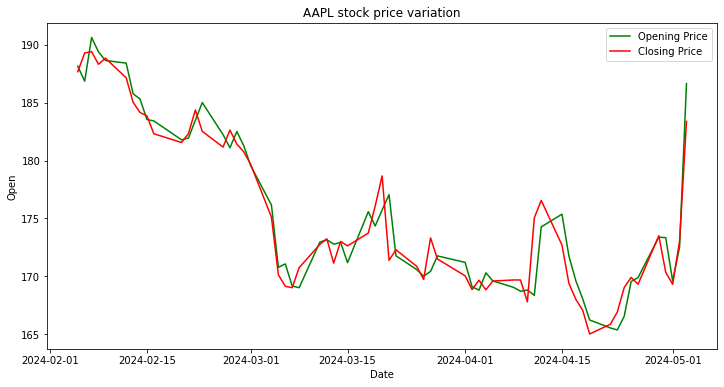

In [61]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data

plt.figure(figsize=(12,6))
sns.lineplot(y = 'Open', x='Date', data=aapl_3mo, label='Opening Price', color='green')
sns.lineplot(y = 'Close', x='Date', data=aapl_3mo, label='Closing Price', color='red')
plt.legend()
plt.title('AAPL stock price variation')

**Observations:**
- In the above plot, wider the gap between Opening and Closing prices, the higher the volatility and positive/negative returns for the day. To better understand the Intra day movement, lets create a new column for intra day percentage returns from Open to Close and analyze the distribution.

## EDA: Plotting a histrogram of a stock's intra day returns in the last 3 months

In [62]:
aapl_3mo['Intra Day Return'] = 100 * (aapl_3mo['Close'] - aapl_3mo['Open']) / aapl_3mo['Open']

<ipython-input-62-9c912c428221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_3mo['Intra Day Return'] = 100 * (aapl_3mo['Close'] - aapl_3mo['Open']) / aapl_3mo['Open']


In [63]:
aapl_3mo['Intra Day Return'].describe()

count    63.000000
mean     -0.095950
std       1.024572
min      -3.208133
25%      -0.618254
50%      -0.141945
75%       0.302090
max       3.980040
Name: Intra Day Return, dtype: float64

Text(0.5, 1.0, 'AAPL Intra Day Returns Histogram')

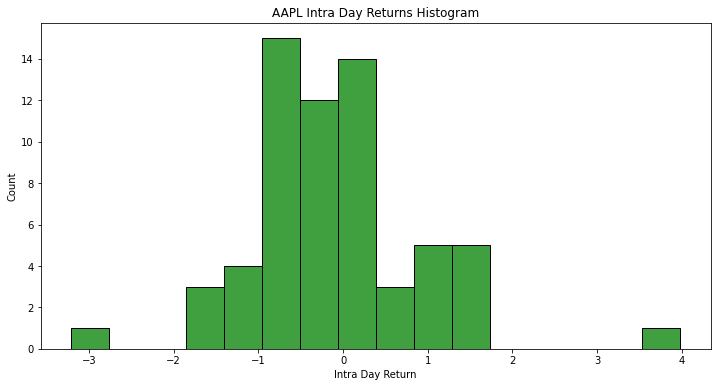

In [64]:
# Plot the histogram of Apple's intra day returns percentage over the last 3 months 
plt.figure(figsize=(12,6))
sns.histplot(x='Intra Day Return', data=aapl_3mo, color='green')
plt.title('AAPL Intra Day Returns Histogram')

**Observations:**
- Above figure illustrates Intra day movement outliers with negative returns of -3% and positive returns ~4%.

## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

Text(0.5, 1.0, 'AAPL Closing Price Histogram')

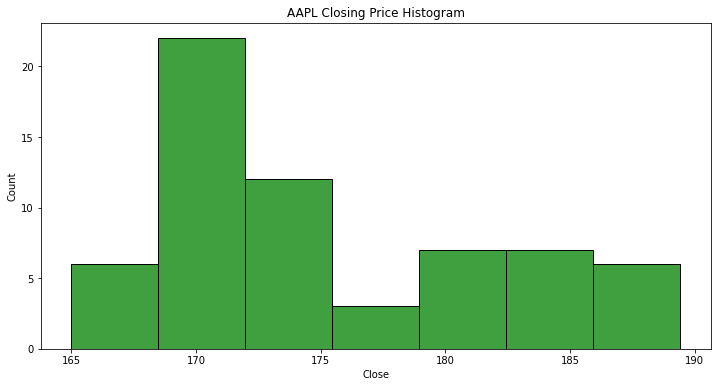

In [65]:
# Plot the histogram of Apple's closing price over the last 3 months 
plt.figure(figsize=(12,6))
sns.histplot(x='Close', data=aapl_3mo, color='green')
plt.title(f'AAPL Closing Price Histogram')

## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [66]:
# Calculate daily returns for Apple and Microsoft
for df in [aapl, msft]:
    df['1_d_returns'] = aapl['Close'].pct_change()

In [67]:
aapl.head()

,Date,Close,Volume,Open,High,Low,1_d_returns
0,2014-05-06,21.23,373872650,21.49,21.59,21.23,NaN
1,2014-05-07,21.15,282128727,21.26,21.33,20.99,-0.003768
2,2014-05-08,21.00,228973884,21.01,21.23,20.94,-0.007092
3,2014-05-09,20.91,291068564,20.88,20.94,20.73,-0.004286
4,2014-05-12,21.17,212736019,20.98,21.20,20.98,0.012434


In [68]:
# Calculate the percent change in inflation from month to month
inflation['Change'] = inflation['Inflation'].pct_change()

In [69]:
inflation.head()

,Date,Inflation,Change
0,1968-01-31,3.651861,NaN
1,1968-02-29,3.673819,0.006013
2,1968-03-31,4.142164,0.127482
3,1968-04-30,4.155828,0.003299
4,1968-05-31,4.088245,-0.016262


### 2. Interpolate stock returns from daily to monthly

In [70]:
def get_monthly_returns(df):
    '''
        Compute monthly returns from daily stock price values by computing percentage change
        between monthly first Open and last Close values.
        
        Inputs:
            df: dataframe to be operated on
            
        Returns:
            The monthly returns dataframe
    '''
    
    return (df
            .set_index('Date')
            .resample('M')
            .agg({'Open': 'first', 'Close': 'last'})
            .assign(Monthly_Return=lambda x: x['Close'] / x['Open'] - 1)
            .reset_index()
           )

Alternatives to above implementation of monthly return computation.

- Simple average of daily returns 
 
 ```
.set_index('Date')['1_d_returns']
            .resample('M')
            .mean()
            .rename('1_mo_return')
            .reset_index()
 ```
- Compounded monthly returns 

```
.set_index('Date')['1_d_returns']
            .resample('M')
            .agg(lambda x: (x + 1).prod() - 1)
            .rename('1_mo_return')
            .reset_index()
```

In [71]:
aapl_1mo_returns = get_monthly_returns(aapl)
aapl_1mo_returns.head()

,Date,Open,Close,Monthly_Return
0,2014-05-31,21.49,22.61,0.052117
1,2014-06-30,22.64,23.23,0.026060
2,2014-07-31,23.38,23.90,0.022241
3,2014-08-31,23.73,25.63,0.080067
4,2014-09-30,25.77,25.19,-0.022507


Above output shows resampled data to monthly granularity with new column of Monthly returns. Lets perform similar transformation to MSFT data.

In [72]:
msft_1mo_returns = get_monthly_returns(msft)
msft_1mo_returns.head()

,Date,Open,Close,Monthly_Return
0,2014-05-31,39.29,40.94,0.041995
1,2014-06-30,40.95,41.70,0.018315
2,2014-07-31,41.86,43.16,0.031056
3,2014-08-31,43.21,45.43,0.051377
4,2014-09-30,45.43,46.36,0.020471


### 3. Merge the dataframes and calculate / plot the correlation

Lets begin with merge of stock prices data.

In [73]:
stocks = pd.merge(aapl_1mo_returns, msft_1mo_returns, on='Date', suffixes=('_AAPL', '_MSFT'))

In [74]:
stocks.head()

,Date,Open_AAPL,Close_AAPL,Monthly_Return_AAPL,Open_MSFT,Close_MSFT,Monthly_Return_MSFT
0,2014-05-31,21.49,22.61,0.052117,39.29,40.94,0.041995
1,2014-06-30,22.64,23.23,0.026060,40.95,41.70,0.018315
2,2014-07-31,23.38,23.90,0.022241,41.86,43.16,0.031056
3,2014-08-31,23.73,25.63,0.080067,43.21,45.43,0.051377
4,2014-09-30,25.77,25.19,-0.022507,45.43,46.36,0.020471


Above output confirms the merge operation with the help of suffix to differentiate the stock tickers.

Next, lets merge the monthly Inflation data.

In [75]:
merged = pd.merge(stocks, inflation, on='Date', how='inner')

In [76]:
merged.head()

,Date,Open_AAPL,Close_AAPL,Monthly_Return_AAPL,Open_MSFT,Close_MSFT,Monthly_Return_MSFT,Inflation,Change
0,2014-05-31,21.49,22.61,0.052117,39.29,40.94,0.041995,2.127518,0.050251
1,2014-06-30,22.64,23.23,0.026060,40.95,41.70,0.018315,2.142724,0.007147
2,2014-07-31,23.38,23.90,0.022241,41.86,43.16,0.031056,2.098319,-0.020724
3,2014-08-31,23.73,25.63,0.080067,43.21,45.43,0.051377,1.959017,-0.066387
4,2014-09-30,25.77,25.19,-0.022507,45.43,46.36,0.020471,1.950170,-0.004516


### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [77]:
# Calculate correlation matrix
corr_matrix = merged[['Monthly_Return_AAPL', 'Monthly_Return_MSFT', 'Inflation']].corr()

In [78]:
corr_matrix

,Monthly_Return_AAPL,Monthly_Return_MSFT,Inflation
Monthly_Return_AAPL,1.000000,0.610562,-0.054393
Monthly_Return_MSFT,0.610562,1.000000,-0.061702
Inflation,-0.054393,-0.061702,1.000000


### 5. Plot the correlation matrix as a heatmap 

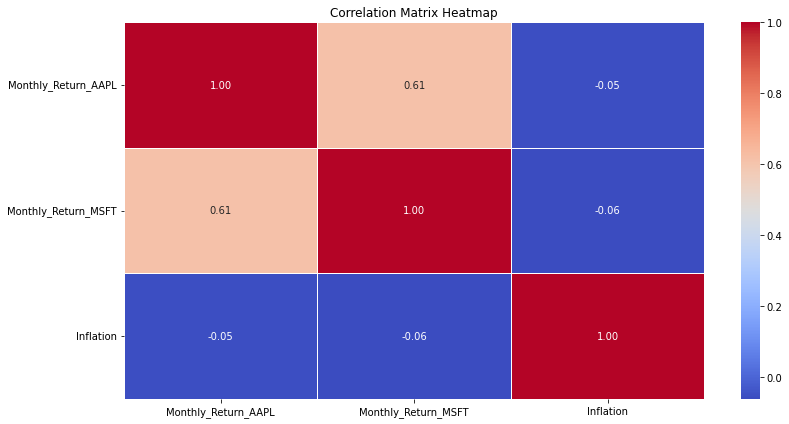

In [79]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

**Observations:**
- Strong positive correlation in the monthly returns of AAPL and MSFT. This is expected as they both are part of Big Tech companies and have significant share in popular indices such as S&P 500, NASDAQ 100, etc.
- Surprisingly, low correlation between monthly returns and Inflation data.

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [80]:
aapl_3mo.head()

,Date,Close,Volume,Open,High,Low,Intra Day Return
2454,2024-02-05,187.68,69668820,188.15,189.25,185.84,-0.249801
2455,2024-02-06,189.30,43490760,186.86,189.31,186.77,1.305790
2456,2024-02-07,189.41,53438960,190.64,191.05,188.61,-0.645195
2457,2024-02-08,188.32,40962050,189.39,189.54,187.35,-0.564972
2458,2024-02-09,188.85,45155220,188.65,189.99,188.00,0.106016


In [81]:
aapl_3mo.set_index('Date', inplace=True)

In [82]:
# Define the window size for the rolling calculation (e.g., one week)
window_size = '7D'

In [83]:
# Calculate rolling one-week volatility
aapl_3mo['Volatility'] = (aapl_3mo['Close']
                      .rolling(window=window_size)
                      .std()
                     )

<ipython-input-83-9920bd2fbd0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_3mo['Volatility'] = (aapl_3mo['Close']


In [84]:
aapl_3mo['Volatility'].describe()

count    62.000000
mean      2.002456
std       1.232431
min       0.369689
25%       1.146695
50%       1.731766
75%       2.692601
max       5.583276
Name: Volatility, dtype: float64

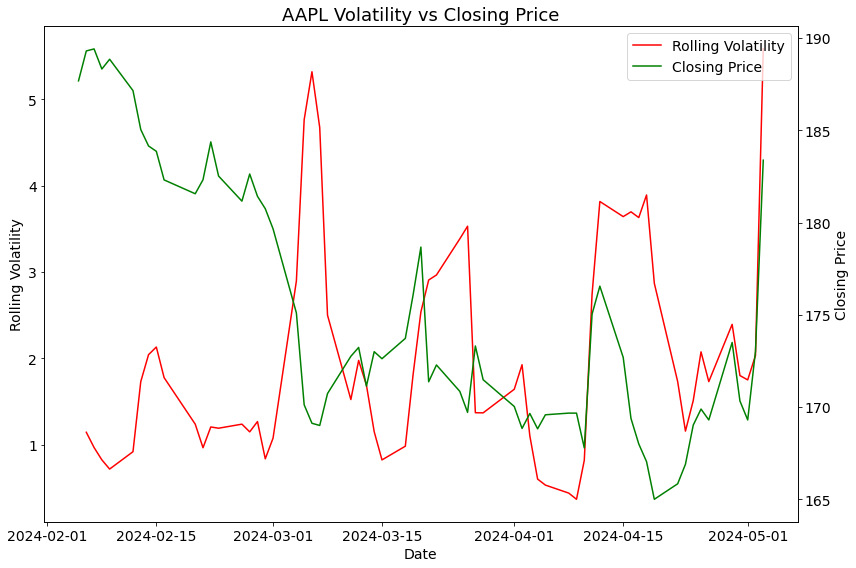

In [85]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes

color_vol = 'red'
color_close = 'green'

# Create the figure with shared X-axis
fig, ax1 = plt.subplots(figsize=(12,8), sharex = True)

# Plot rolling volatility on the first y-axis
sns.lineplot(x=aapl_3mo.index, y=aapl_3mo['Volatility'], color=color_vol, label='Rolling Volatility', ax=ax1)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Rolling Volatility', fontsize=14)

# Create a second y-axis on the same plot
ax2 = ax1.twinx()

# Plot Closing Price on the second y-axis
sns.lineplot(x=aapl_3mo.index, y=aapl_3mo['Close'], color=color_close, label='Closing Price', ax=ax2)
ax2.set_ylabel('Closing Price', fontsize=14)

# Merge the labels into one legend by specifying both labels
# Using `ax1`'s legend method, we can merge the legend for both datasets
lines = ax1.get_lines() + ax2.get_lines()  # Combine the lines from both axes
labels = [line.get_label() for line in lines]  # Get the labels of the lines

# Plot the single legend
ax1.legend(lines, labels, loc='upper right', fontsize=14)
ax2.get_legend().remove()

# Increase the tick font sizes
ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

# Title and display the plot
plt.title('AAPL Volatility vs Closing Price', fontsize=18)
plt.tight_layout()
plt.show()

**Observations:**
Volatility shoots up during sharp drawdowns in Closing price and reduces around the peaks.

Lets confirm this by plotting the correlation matrix between Rolling Volatility and Closing Price.

In [86]:
vol_corr = aapl_3mo[['Close', 'Volatility']].corr()

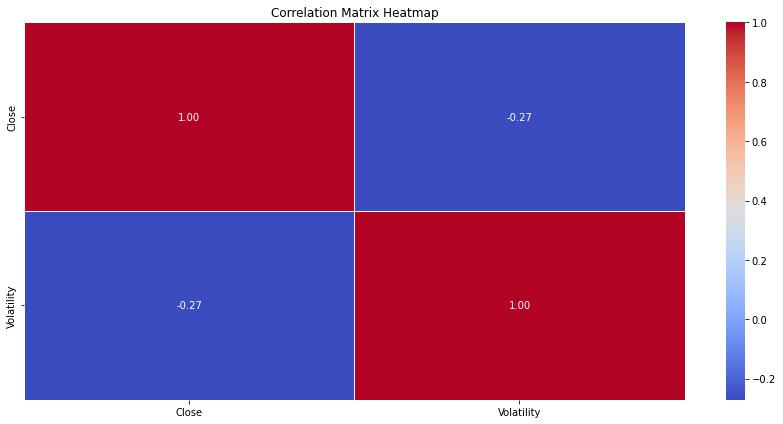

In [87]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(vol_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

Above output indicates non-negligible negative correlation between Close price and Volatility in the last 3 months.

## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [88]:
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")
timestamp

'2025-04-19_20-49'

In [89]:
def export_to_csv(df, csv_prefix, ts):
    '''
        Simplistic util function to export processed dataframe to CSV.
        
        Inputs:
            df        : dataframe to be exported
            csv_prefix: CSV filename prefix
            
        Returns: None
            
    '''
    csv_name = f'{csv_prefix}-processed-{ts}.csv'
    df.to_csv(
        csv_name,
        index=False,
        encoding='utf-8',
        float_format="%.3f"
    )

In [91]:
# Export GDP data
export_to_csv(gdp, 'GDP', timestamp)

# Export AAPL dataframe
export_to_csv(aapl, 'AAPL', timestamp)

# Export MSFT dataframe
export_to_csv(msft, 'MSFT', timestamp)

# Export Inflation dataframe
export_to_csv(inflation, 'Inflation', timestamp)

Lets confirm the exported files in the directory.

In [92]:
files = os.listdir('.')
files

['AAPL-processed-2025-04-19_20-49.csv',
 'apple_historical_data.csv',
 'inflation_monthly.csv',
 'MSFT-processed-2025-04-19_20-49.csv',
 'GDP-processed-2025-04-19_20-49.csv',
 'readme.md',
 'microsoft_historical_data.csv',
 'Inflation-processed-2025-04-19_20-49.csv',
 'consumer_price_index.csv',
 '.ipynb_checkpoints',
 'GDP.csv',
 'Preparing-for-data-analysis-project-student.ipynb']

Fin.